<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
CS6501 - MACHINE LEARNING AND APPLICATIONS
#**Business Analytics - MSc**
ET5003 - MACHINE LEARNING APPLICATIONS 
##***Annual Repeat***
###Instructor: Enrique Naredo

###RepMLA_Etivity-2.0

# Introduction

[Classification](https://towardsdatascience.com/machine-learning-classifiers-a5cc4e1b0623) is the process of predicting the class of given data points.

- An easy to understand example is classifying emails as “spam” or “not spam.”
- In machine learning an algorithm learns how to assign a class label to examples from a problem domain.
- Classification belongs to the category of supervised learning where the targets also provided with the input data.

In this notebook we will solve a classification problem using the well-known Mnist dataset and the also well-known classifier algorithm Logistic Regression.

# Dataset

The [MNIST](https://en.wikipedia.org/wiki/MNIST_database) database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits.

- The MNIST database contains 60,000 training images and 10,000 testing images.
- An extended dataset similar to MNIST called EMNIST has been published in 2017, which contains 240,000 training images, and 40,000 testing images of handwritten digits and characters

### Import Dataset

In [19]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [20]:
# import the MNIST dataset
from keras.datasets import mnist
# load the MNIST dataset
data = mnist.load_data()

### Training and Testing set

In [21]:
# Dataset is a class 'tuple'
# A tuple is an (immutable) ordered list of values
print(type(data))

<class 'tuple'>


In [22]:
# it has two tuples
# data -> data[0] & data[1]
# data[0]-> (train)
# data[1]-> (test)
len(data)

2

In [23]:
# each tuple has other two tuples
# each containing: (dataPoints, classLabels)
print(len(data[0]))
print(len(data[1]))

2
2


In [24]:
# 1st main tuple (train)
# 2nd main tuple (test)
(X_train, y_train), (X_test, y_test) = data

**Train**
 - X_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data.
 - 60,000 images
 - Each image is a matrix of 28x28 pixels
 - Pixel values range from 0 to 255.

 - y_train: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.


In [25]:
# shape returns the number of corresponding elements
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


**Test**
 - X_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. 
 - 10,000 images
 - Each image is a matrix of 28x28 pixels
 - Pixel values range from 0 to 255.

 - y_test: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.

In [26]:
# shape returns the number of corresponding elements
print(X_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


### Showing the data

In [27]:
# each data element is a different image
# arranged in a matrix with pixel values range from 0 to 255
# pixels close to 0 tends to black
# pixels close to 255 tends to white
# here the first image
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [28]:
# class labels are the number 
# corresponding to the handwriten

# here the first 10 
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

5
Class label for this image: 5


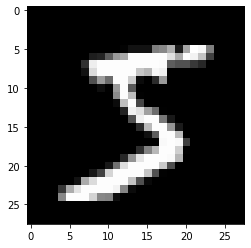

In [29]:
# A data element in the training set
image_train = 0
plt.imshow(X_train[image_train,:,:],cmap='gray'),print(y_train[image_train])
print('Class label for this image: ' + str(y_train[image_train]))

7
Class label for this image: 7


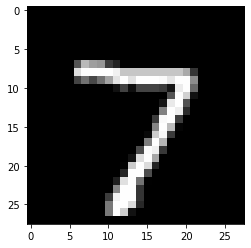

In [31]:
# A data element in the test set
image_test = 0
plt.imshow(X_test[image_test,:,:],cmap='gray'),print(y_test[image_test])
print('Class label for this image: ' + str(y_test[image_test]))

In [32]:
# Function to plot an arrange of images
def plot_images(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image,  cmap='gray', **options)
    plt.axis("off")

True value =
 [[5 0 4 1 9 2 1 3 1]
 [4 3 5 3 6 1 7 2 8]
 [6 9 4 0 9 1 1 2 4]]


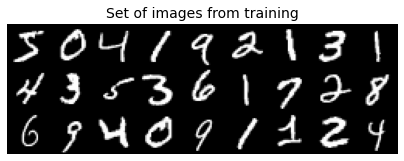

In [33]:
# Plotting a set of images from training
plt.figure(figsize=(7,7))
plot_images(X_train[0:27,:],images_per_row=9)
plt.title("Set of images from training", fontsize=14)
print("True value =\n",y_train[0:27].reshape(-1,9))

True value =
 [[7 2 1 0 4 1 4 9 5]
 [9 0 6 9 0 1 5 9 7]
 [3 4 9 6 6 5 4 0 7]]


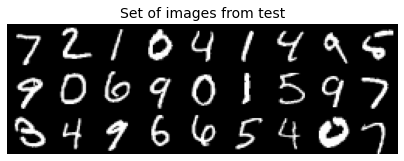

In [35]:
# Plotting a set of images from test
plt.figure(figsize=(7,7))
plot_images(X_test[0:27,:],images_per_row=9)
plt.title("Set of images from test", fontsize=14)
print("True value =\n",y_test[0:27].reshape(-1,9))

# Classifying images

An [image](https://en.wikipedia.org/wiki/Image) (from Latin: imago) is an artifact that depicts visual perception, such as a photograph or other two-dimensional picture, that resembles a subject—usually a physical object—and thus provides a depiction of it. 

- In the context of signal processing, an image is a distributed amplitude of color(s).
- A [greyscale](https://en.wikipedia.org/wiki/Grayscale) image is one in which the value of each pixel is a single sample representing only an amount of light; that is, it carries only intensity information. 
- Greyscale images, a kind of black-and-white or grey monochrome, are composed exclusively of shades of grey. 
- The contrast ranges from black at the weakest intensity to white at the strongest.

In [36]:
# Visualize the intensity values
# and the actual tone in each pixel
image2show = 10

df = pd.DataFrame(X_train[image2show,:,:])
df = df.style.background_gradient(cmap='gray')
display(df)

print('\n\n\nClass label for this image: ' + str(y_train[image2show]))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,42,118,219,166,118,118,6,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,103,242,254,254,254,254,254,66,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,18,232,254,254,254,254,254,238,70,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,104,244,254,224,254,254,254,141,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,207,254,210,254,254,254,34,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,84,206,254,254,254,254,41,0,0,0,0,0,0,0,0,0





Class label for this image: 3


## Converting a set of images into a table
Convert each image (a $28\times 28$ matrix) into a **row** vector, whose dimension is $1 \times 784$.

In [37]:
X_train_r = X_train.reshape(X_train.shape[0],28*28)
X_test_r  = X_test.reshape(X_test.shape[0],28*28)

In [38]:
datav = np.hstack([X_train_r, y_train.reshape(-1,1)])
df = pd.DataFrame(datav[0:7,:])
df = df.style.background_gradient(cmap='gray')
display(df)

## Scaling
Scale the resulting matrix to the interval $[0,1]$, so we can now apply a machine leaning such as:
* logistic regression
* multi-layer perceptron 

In [39]:
## scale to [0,1]

# dividing over the max value: 255
X_train_r = X_train_r/255
X_test_r = X_test_r/255

# Methods

## Logistic Regression

[Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression), in statistics the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. 

* This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. 
* Each object being detected in the image would be assigned a probability between 0 and 1, with a sum of one. 

In [41]:
# import the LogisticRegression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(multi_class='multinomial',solver='lbfgs',  fit_intercept=True, max_iter=100)
LR.fit(X_train_r,y_train)
y_pred = LR.predict(X_test_r)
print("Training set score: %f" % LR.score(X_train_r, y_train))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training set score: 0.935050


## Multi-layer perceptron

A multilayer perceptron ( [MLP](https://en.wikipedia.org/wiki/Multilayer_perceptron)) is a class of feedforward artificial neural network (ANN). 

* The term MLP is used ambiguously, sometimes loosely to any feedforward ANN, sometimes strictly to refer to networks composed of multiple layers of perceptrons.
* An MLP consists of at least three layers of nodes: an input layer, a hidden layer and an output layer. 
* Except for the input nodes, each node is a neuron that uses a nonlinear activation function. 
* MLP utilizes a supervised learning technique called backpropagation for training.
* Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. 

In [42]:
# import the MLPClassifier
from sklearn.neural_network import MLPClassifier

MLPC = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

In [43]:
# train MLPClassifier
MLPC.fit(X_train_r, y_train)


Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05530788
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50,), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=10, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=10, warm_start=False)

In [44]:
print("Training set score: %f" % MLPC.score(X_train_r, y_train))

Training set score: 0.986800


# Summary

# References

# Tasks:
* Compute the accuracy of the classifier
* Compute the confusion matrix of the predictions versus the true classes (see [link](https://www.python-course.eu/confusion_matrix.php) about what a confusion matrix is and [here](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html) how to compute and plot it).
* Visualise (using the plot function provided at the beginning of the notebook) instances (images) where the predicted class was wrong. What can you notice?